### Dataset
Fonte: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

Objetivo: Criar um algoritmo de NLP para classificar os comentários de um e-commerce de roupa feminina como positivo ou negativo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
dados.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
dados.shape

(23486, 11)

In [4]:
dados.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
dados.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
dados.dropna(axis = 0, subset=['Review Text'], inplace=True)

In [7]:
dados.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [8]:
dados.shape

(22641, 11)

In [9]:
#criando uma string
comentarios = dados['Review Text'].tolist()
len(comentarios)

22641

In [10]:
#deixando todas as palavras da lista como uma única string
comentarios_string =  ' '.join(comentarios)

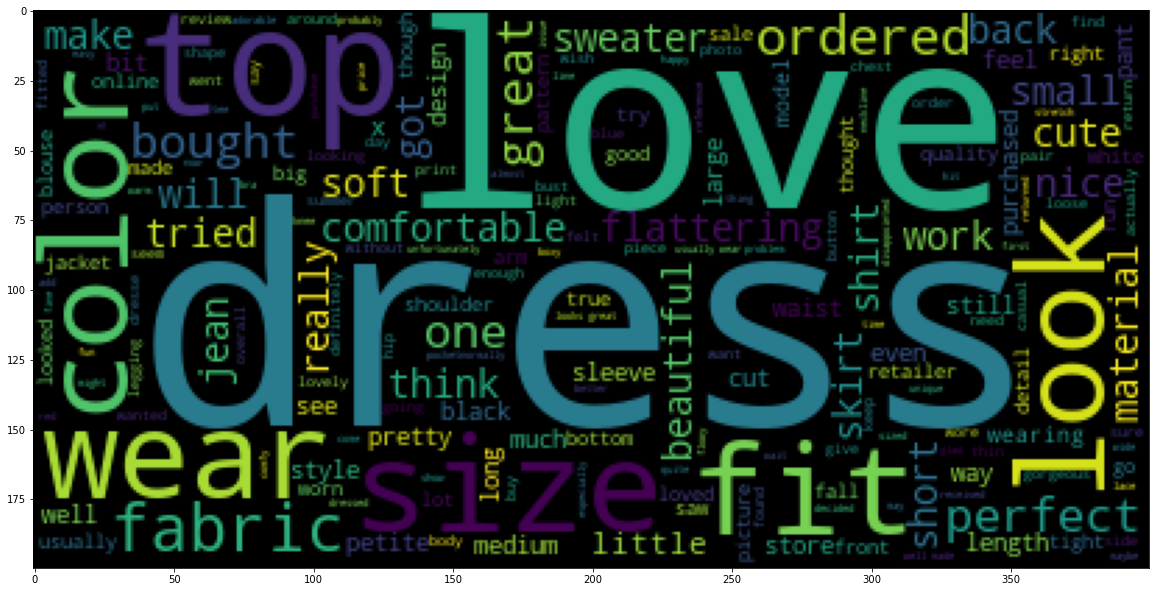

In [11]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(comentarios_string));

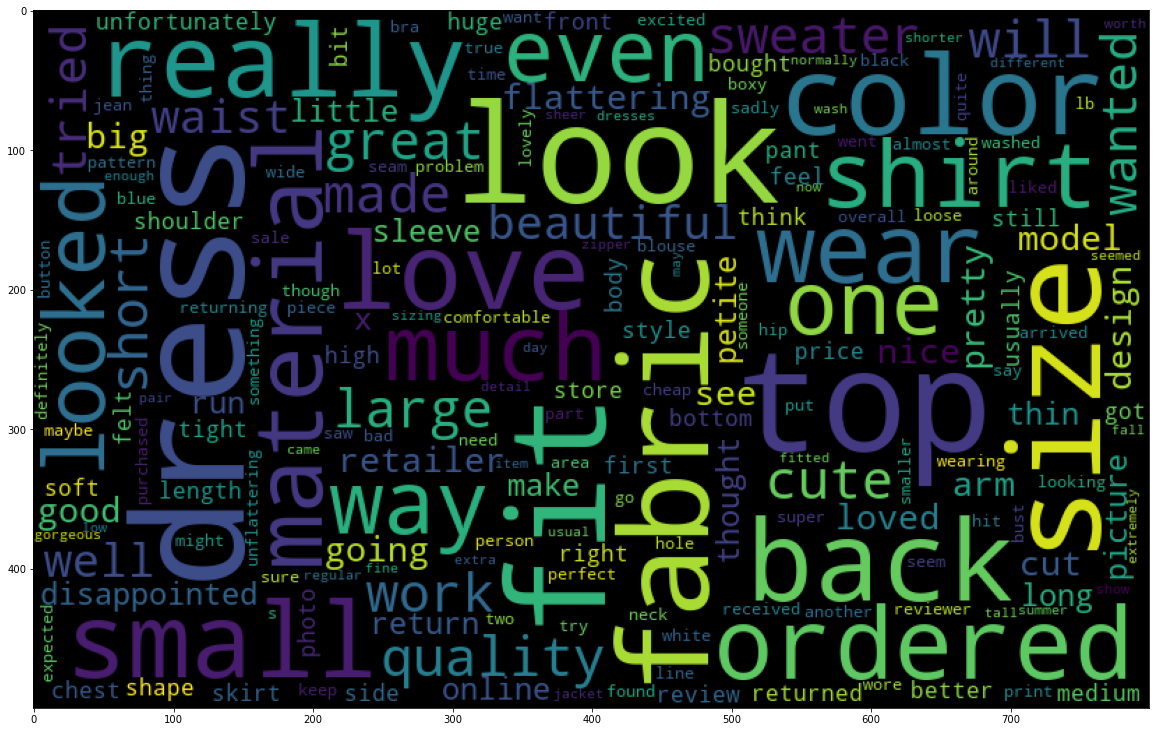

In [12]:
#nuvem de palavras para comentário negativo

negativo = dados[dados['Recommended IND'] == 0]
comentarios_neg = negativo['Review Text'].tolist()
comentarios_neg_string =  ' '.join(comentarios_neg)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(comentarios_neg_string));

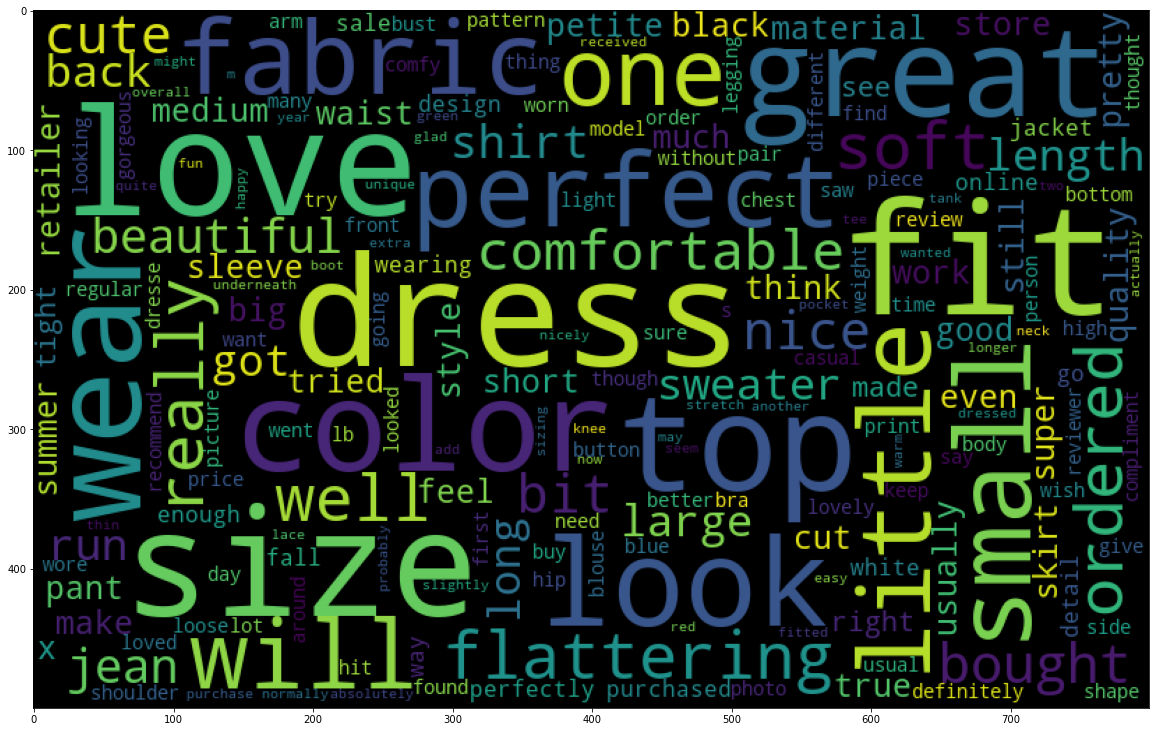

In [13]:
#nuvem de palavras positivas
positivo = dados[dados['Recommended IND'] == 1]
comentarios_pos = positivo['Review Text'].tolist()
comentarios_pos_string =  ' '.join(comentarios_pos)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(comentarios_pos_string));

In [14]:
dados['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

### Análise de dados

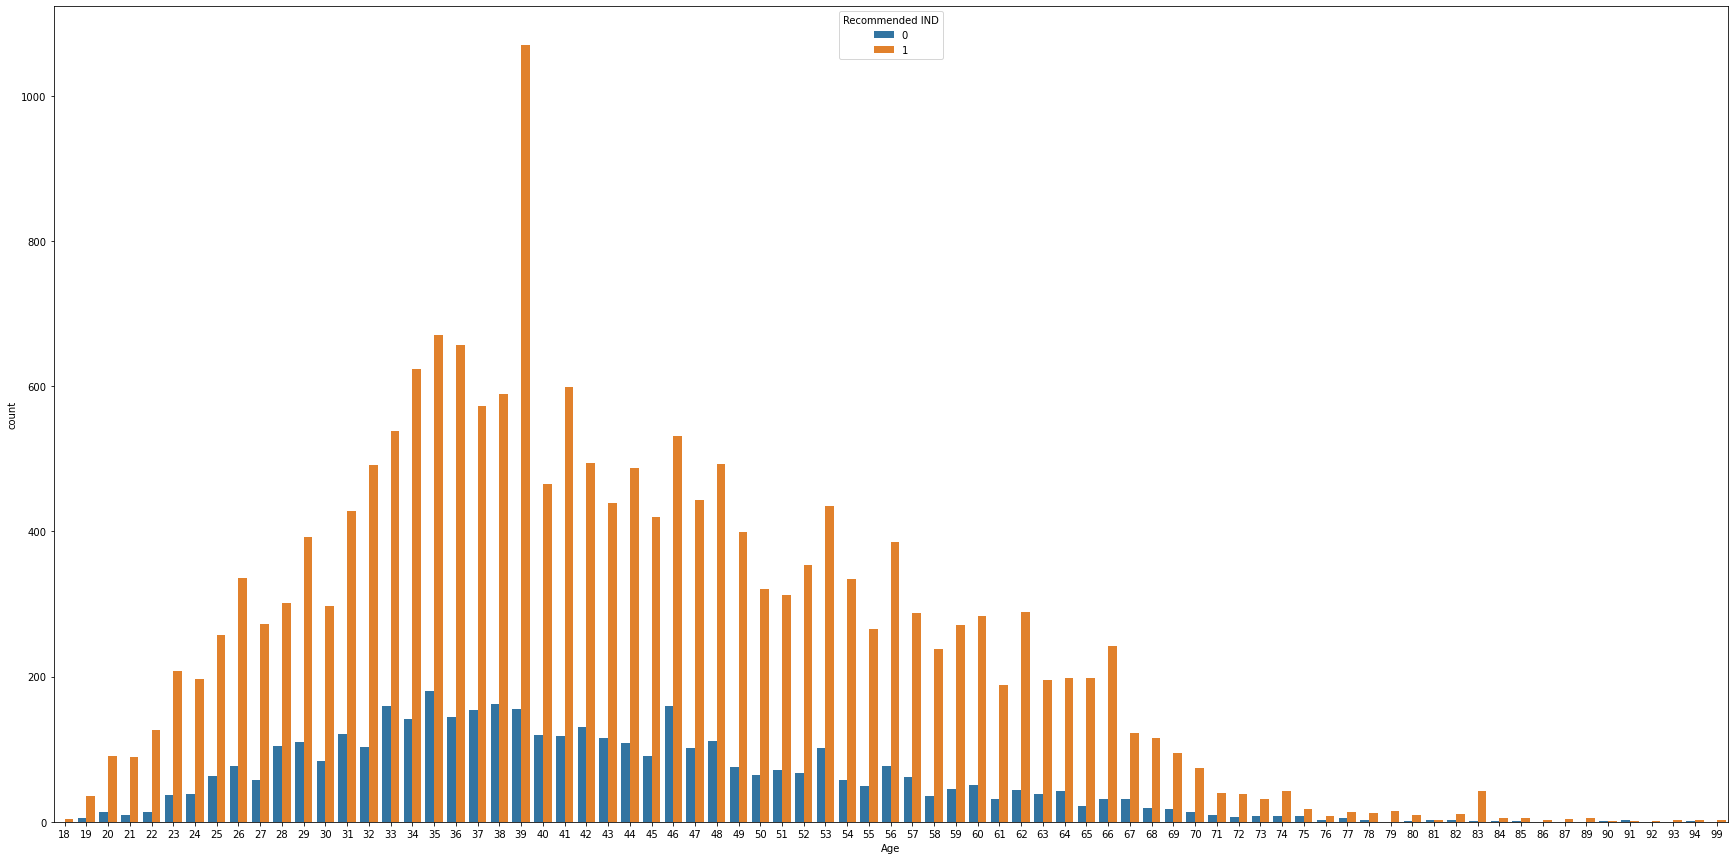

In [15]:
plt.figure(figsize = (30,15))
sns.countplot(x='Age', hue = 'Recommended IND', data = dados);

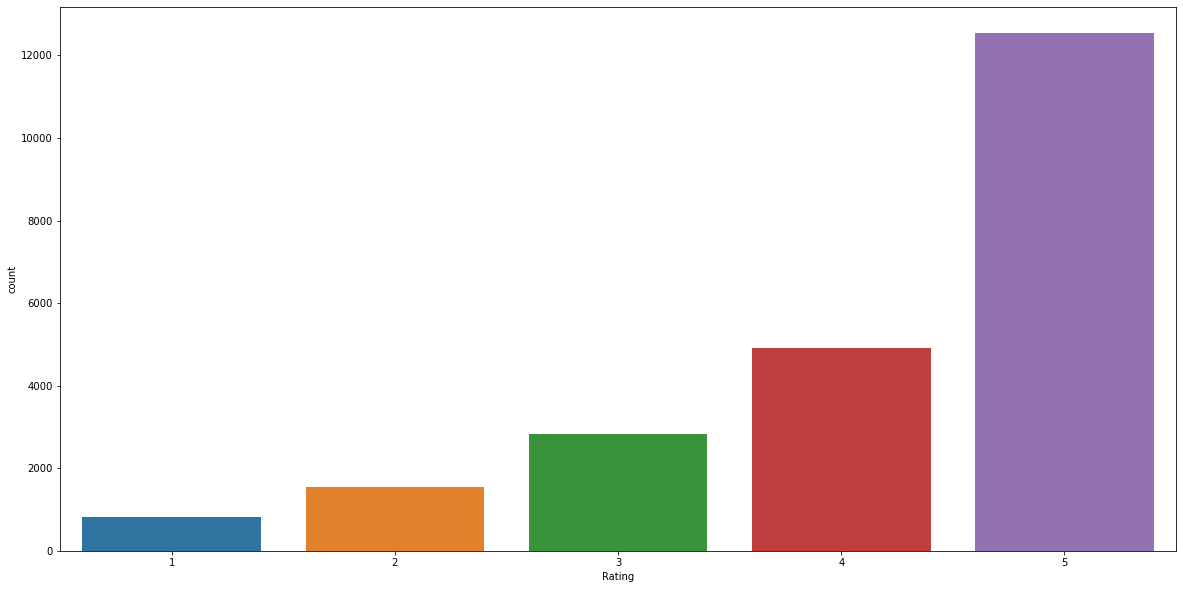

In [16]:
plt.figure(figsize = (20,10))
sns.countplot(x='Rating', data = dados);

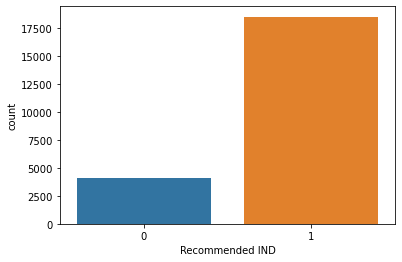

In [17]:
sns.countplot(x='Recommended IND', data = dados);

In [18]:
print(dados['Division Name'].value_counts())


General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64


In [19]:
dados['Department Name'].value_counts()


Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

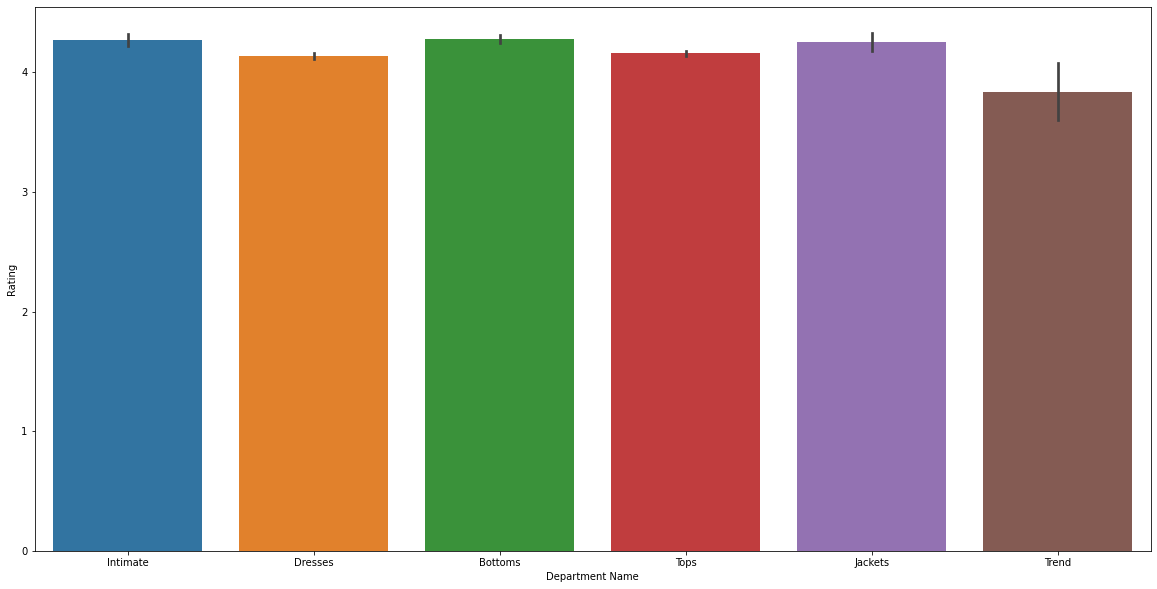

In [20]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Department Name', y = 'Rating', data = dados);

In [21]:
dados['Class Name'].value_counts()


Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: Class Name, dtype: int64

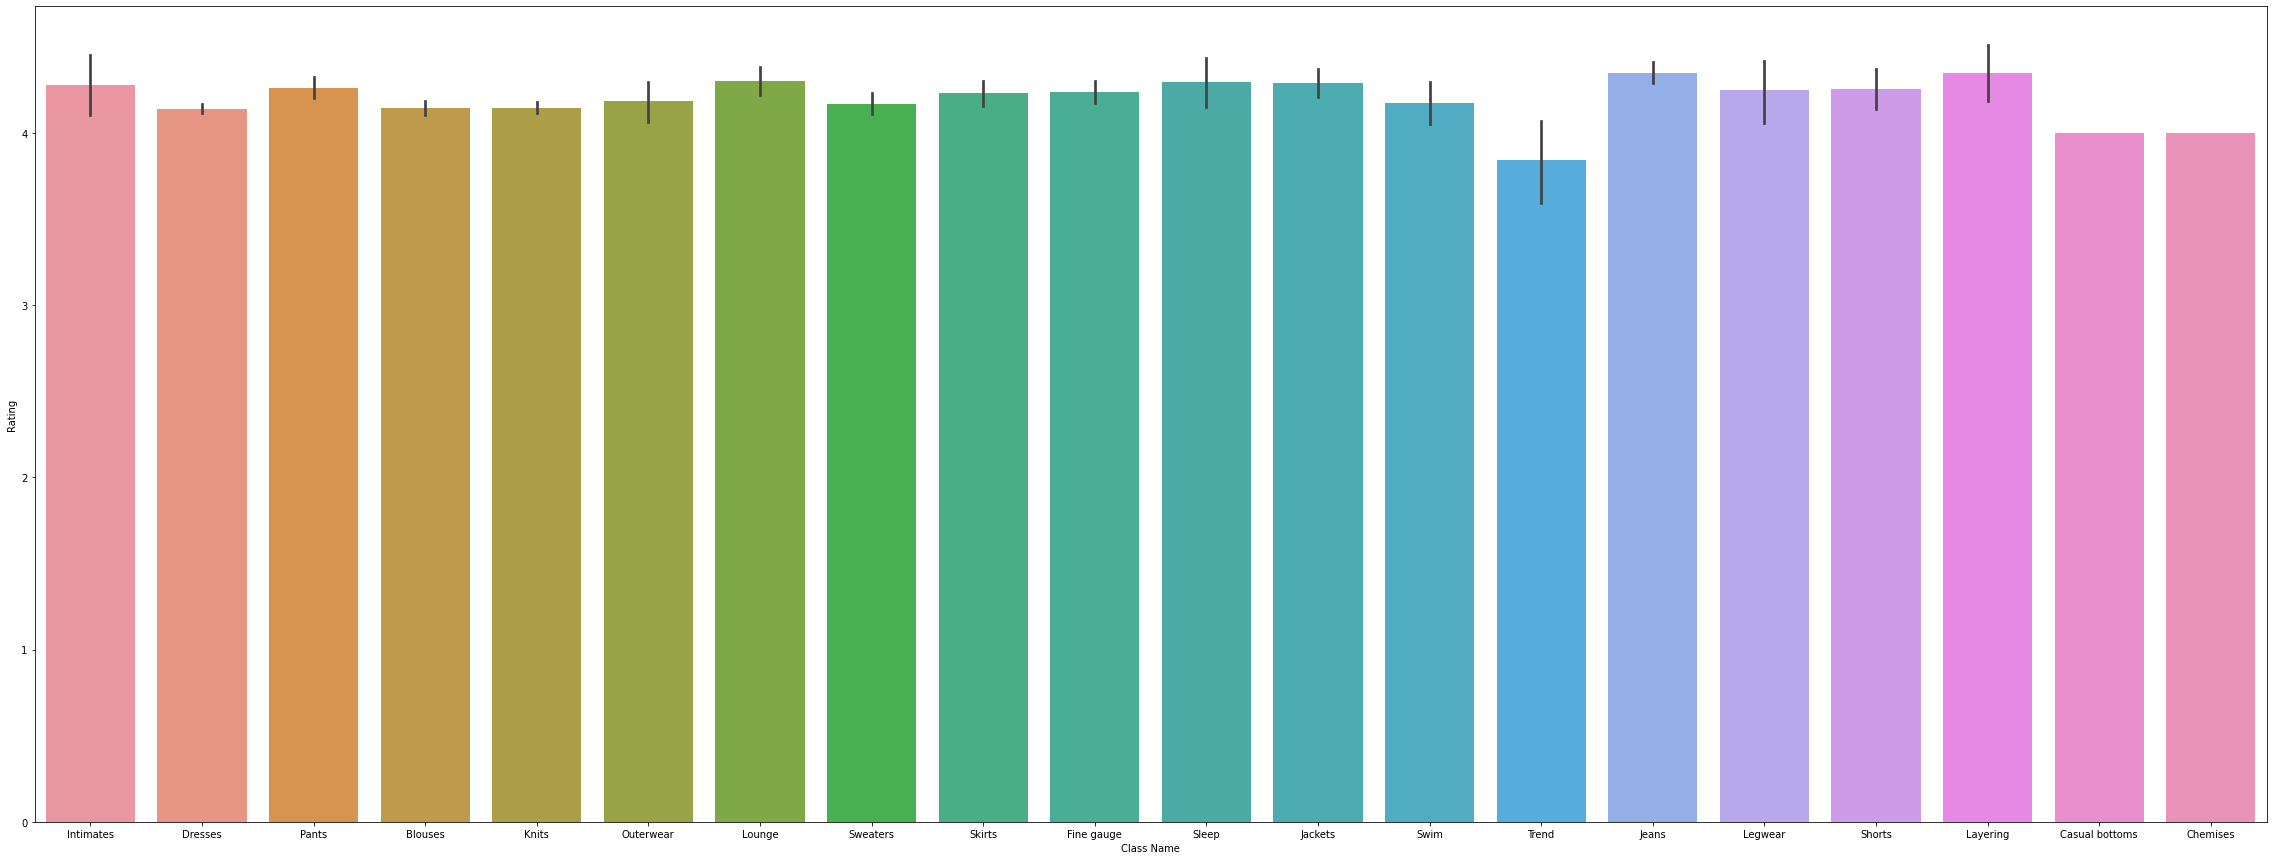

In [22]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'Class Name', y = 'Rating', data = dados);

### Limpeza dos dados

In [23]:
#apagando todas as features e deixando somente a de comentário do texto e a de classificação
dados = dados.drop(['Unnamed: 0', 'Clothing ID', 'Title', 'Positive Feedback Count','Rating', 'Age'], axis = 1)

In [24]:
dados = dados.drop(['Division Name', 'Department Name','Class Name'], axis = 1)

In [25]:
dados.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Tratamento do texto

- remover a pontuação dos textos com a função string punctuation
- remover stop words
- deixar todas as palavras em minúsculo
- tokenização das palavras

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
#Natural Language Toolkit
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p_net\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Tokenização

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize

In [30]:
token_space = tokenize.WhitespaceTokenizer()

In [31]:
# Transformando a coluna Review Text em String
print(type(dados['Review Text']))
dados['Review Text'] = dados['Review Text'].astype(str)

<class 'pandas.core.series.Series'>


In [32]:
#definindo uma função para tratar o texto


def message_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(dados['Review Text'])

In [34]:
len(vectorizer.get_feature_names())

C:\Users\p_net\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


19807

In [35]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
# reviews_countvectorizer é uma matriz esparsa
reviews_countvectorizer

<22641x19807 sparse matrix of type '<class 'numpy.int64'>'
	with 616412 stored elements in Compressed Sparse Row format>

In [37]:
reviews_countvectorizer.shape

(22641, 19807)

In [38]:
dados.drop(['Review Text'], axis = 1, inplace=True)


In [39]:
type(reviews_countvectorizer)

scipy.sparse.csr.csr_matrix

In [40]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray(),
                      columns=vectorizer.get_feature_names())

In [41]:
reviews

,0,00,000,002first,00p,00p0p,00p0rxxsxs,02,025,02xs,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,â,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#removendo as palavras que começam com números
N = 500
first_n_column  = reviews.iloc[: , :N]

In [43]:
first_n_column

,0,00,000,002first,00p,00p0p,00p0rxxsxs,02,025,02xs,...,30th,31,312,312434and,3132,315,31p,31s,31size,31st
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
reviews = reviews.drop(first_n_column, axis = 1)

In [45]:
reviews.head()

,32,322436,3224432,3224532,32245325,322635,322636,3234,3234a,3234ddd,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,â,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
N = 488
first_n_column  = reviews.iloc[: , :N]
first_n_column

,32,322436,3224432,3224532,32245325,322635,322636,3234,3234a,3234ddd,...,96,96100,97,98,9800,98lbs,99,9between,9inches,9lower
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
reviews = reviews.drop(first_n_column, axis = 1)

In [48]:
reviews.head()

,Aaaaaaamazing,Absolute,Absolutely,According,Actually,Added,Admittedly,Adorable,Adore,Aesthetically,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,â,ã¼ber
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatenando os DFs

In [49]:
dados = pd.concat([dados, reviews], axis = 1)
dados.head()

,Recommended IND,Aaaaaaamazing,Absolute,Absolutely,According,Actually,Added,Admittedly,Adorable,Adore,...,zipping,zips,zombie,zone,zoolanders,zoom,zooming,zuma,â,ã¼ber
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
dados['Recommended IND'].isnull().sum()

822

In [51]:
dados['Recommended IND'].value_counts()

1.0    18540
0.0     4101
Name: Recommended IND, dtype: int64

In [52]:
dados.dropna(inplace = True)

In [53]:
dados.shape

(21819, 18820)

### Divisão em treino e teste

In [54]:
X = dados.drop('Recommended IND', axis = 1)
y = dados['Recommended IND']

In [55]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state = SEED)

In [58]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



### modelo 1 - regressão logística


In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))

C:\Users\p_net\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.788
Precisão: 0.82
Recall: 0.949
F1: 0.484


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.20      0.06      0.09      1185
         1.0       0.82      0.95      0.88      5361

    accuracy                           0.79      6546
   macro avg       0.51      0.50      0.48      6546
weighted avg       0.71      0.79      0.74      6546



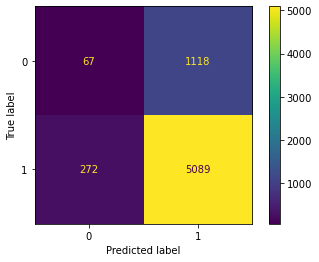

In [61]:
#plotando a matriz de confusão
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### modelo 2 - Multinomial NB


In [63]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))

Acurácia: 0.802
Precisão: 0.821
Recall: 0.969
F1: 0.483


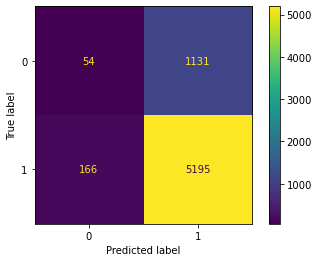

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.25      0.05      0.08      1185
         1.0       0.82      0.97      0.89      5361

    accuracy                           0.80      6546
   macro avg       0.53      0.51      0.48      6546
weighted avg       0.72      0.80      0.74      6546

